In [1]:
import polars as pl
import numpy as np
from datetime import datetime, timedelta
import os

In [2]:
os.listdir()

['merged_flights.parquet',
 '02_flights(1).ipynb',
 'output.parquet',
 'data',
 '.ipynb_checkpoints',
 'flights.parquet',
 '01_exploration.ipynb',
 '03_more_on_flights.ipynb',
 'proyecto_ml',
 'proyecto_ml (2).zip',
 'actividad  1 - videojuegos enunciado.ipynb']

In [3]:
flights_lazy_df = pl.scan_parquet('merged_flights.parquet')
flights_df = flights_lazy_df.collect()
flights_df.shape

(5332914, 37)

In [4]:
flights_df = flights_df.with_columns((pl.col('ARRIVAL_DELAY') > 0).alias('is_delayed'))

In [5]:
flights_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_STATE,is_delayed
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,f64,f64,str,f64,f64,str,bool
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,61.17432,-149.99619,"""AK""",47.44898,-122.30931,"""WA""",false
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",26.68316,-80.09559,"""FL""",false
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,37.619,-122.37484,"""CA""",35.21401,-80.94313,"""NC""",true
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",25.79325,-80.29056,"""FL""",false
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,47.44898,-122.30931,"""WA""",61.17432,-149.99619,"""AK""",false


In [6]:
flights_df.columns

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'ORIGIN_LATITUDE',
 'ORIGIN_LONGITUDE',
 'ORIGIN_STATE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'DESTINATION_STATE',
 'is_delayed']

- ¿ qué variables influyen más en el estar retrasado o no? ¿ qué variables influyen más en cuánto está de restrasado o adelantado?
- anova del efecto del aeropuerto de origen sobre retraso
- anova del efecto del aeropuerto destino sobre retraso
- anova del efecto de mes+aeropuerto origen sobre retraso
- anova del efecto de la distnacia sobre retraso
- Heat map de retrasos entre aeropuertos (pivotal)
- caracterización trayectos según longitud y latitud y distancia
- estudio por aerolineas y trayectos y aeropuertos entrada salida
- estudio en función de número de vuelos en el día en el aeropuerto de salida
- representación gráfica de proporciones de retrasos en el tiempo
- evaluar la simetría en los retrasos
- dependen los retrasos de la hora de salida?
- hay aerolíneas que retrasan más?
- quantiles de retraso en función de distancia

In [7]:
flights_df.select('YEAR').unique(subset=["YEAR"])

YEAR
i64
2015


In [8]:
flights_df.schema

OrderedDict([('YEAR', Int64),
             ('MONTH', Int64),
             ('DAY', Int64),
             ('DAY_OF_WEEK', Int64),
             ('AIRLINE', Utf8),
             ('FLIGHT_NUMBER', Int64),
             ('TAIL_NUMBER', Utf8),
             ('ORIGIN_AIRPORT', Utf8),
             ('DESTINATION_AIRPORT', Utf8),
             ('SCHEDULED_DEPARTURE', Int64),
             ('DEPARTURE_TIME', Int64),
             ('DEPARTURE_DELAY', Int64),
             ('TAXI_OUT', Int64),
             ('WHEELS_OFF', Int64),
             ('SCHEDULED_TIME', Int64),
             ('ELAPSED_TIME', Int64),
             ('AIR_TIME', Int64),
             ('DISTANCE', Int64),
             ('WHEELS_ON', Int64),
             ('TAXI_IN', Int64),
             ('SCHEDULED_ARRIVAL', Int64),
             ('ARRIVAL_TIME', Int64),
             ('ARRIVAL_DELAY', Int64),
             ('DIVERTED', Int64),
             ('CANCELLED', Int64),
             ('CANCELLATION_REASON', Utf8),
             ('AIR_SYSTEM_DELAY', Int64)

In [9]:
import matplotlib.pyplot as plt


In [10]:
delay_global_rate = flights_df.select(
    (pl.col('ARRIVAL_DELAY') > 0).mean()
)[0, 0]
delay_global_rate

0.37193608264371175

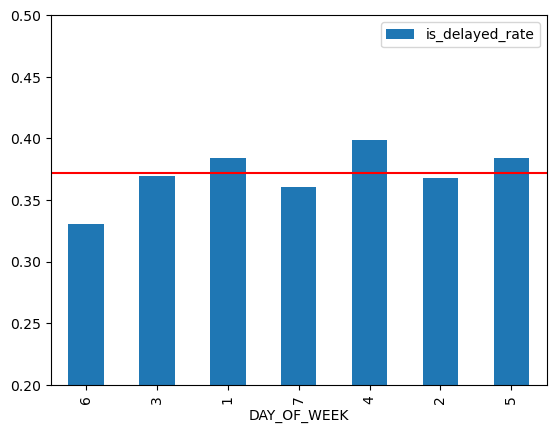

In [11]:
flights_df.group_by('DAY_OF_WEEK').agg(
[        
    pl.col('is_delayed').mean().alias('is_delayed_rate')
]).to_pandas().set_index('DAY_OF_WEEK').plot.bar(ylim=(0.2, 0.5));

plt.axhline(delay_global_rate, c='r');

In [12]:
def plot_effects(df, exog_col, target='is_delayed'):
    flights_df.group_by(pl.col(exog_col)).agg(
    [        
        pl.col('is_delayed').mean().alias('is_delayed_rate')
    ]).to_pandas().set_index(exog_col).sort_index().plot.bar(ylim=(0.2, 0.5));

    plt.axhline(delay_global_rate, c='r');

In [13]:
flights_df.schema

OrderedDict([('YEAR', Int64),
             ('MONTH', Int64),
             ('DAY', Int64),
             ('DAY_OF_WEEK', Int64),
             ('AIRLINE', Utf8),
             ('FLIGHT_NUMBER', Int64),
             ('TAIL_NUMBER', Utf8),
             ('ORIGIN_AIRPORT', Utf8),
             ('DESTINATION_AIRPORT', Utf8),
             ('SCHEDULED_DEPARTURE', Int64),
             ('DEPARTURE_TIME', Int64),
             ('DEPARTURE_DELAY', Int64),
             ('TAXI_OUT', Int64),
             ('WHEELS_OFF', Int64),
             ('SCHEDULED_TIME', Int64),
             ('ELAPSED_TIME', Int64),
             ('AIR_TIME', Int64),
             ('DISTANCE', Int64),
             ('WHEELS_ON', Int64),
             ('TAXI_IN', Int64),
             ('SCHEDULED_ARRIVAL', Int64),
             ('ARRIVAL_TIME', Int64),
             ('ARRIVAL_DELAY', Int64),
             ('DIVERTED', Int64),
             ('CANCELLED', Int64),
             ('CANCELLATION_REASON', Utf8),
             ('AIR_SYSTEM_DELAY', Int64)

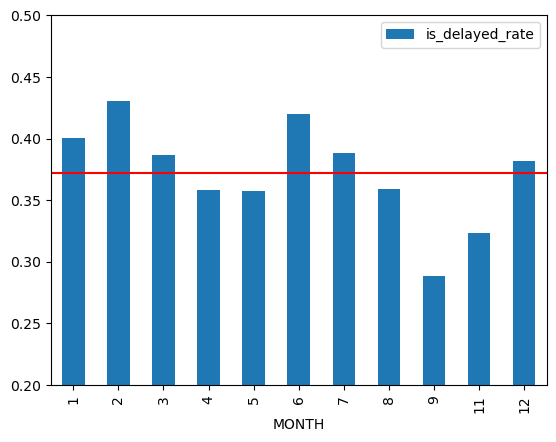

In [14]:
plot_effects(flights_df, exog_col='MONTH')

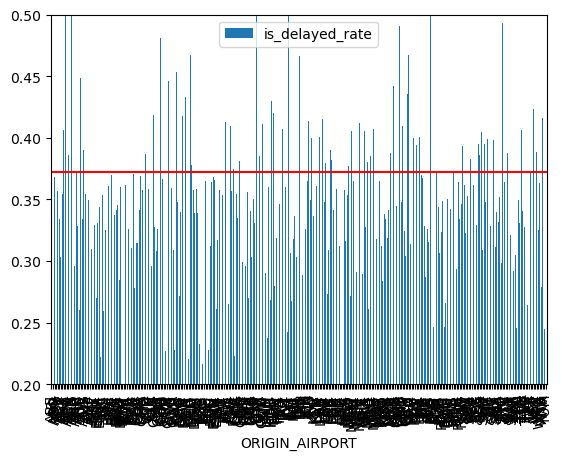

In [15]:
plot_effects(flights_df, exog_col='ORIGIN_AIRPORT')

In [16]:
flights_df.group_by(pl.col('ORIGIN_AIRPORT')).agg(
    [   
        pl.col('is_delayed').count().alias('n_flights'),
        pl.col('is_delayed').mean().alias('is_delayed_rate')
    ]).sort('is_delayed_rate')

ORIGIN_AIRPORT,n_flights,is_delayed_rate
str,u32,f64
"""CNY""",206,0.039024
"""VEL""",206,0.115
"""BTM""",667,0.153014
"""LWS""",588,0.164966
"""DIK""",938,0.208061
"""EKO""",531,0.216634
"""DLG""",77,0.220779
"""BIL""",2866,0.222027
"""GCC""",997,0.223014


In [17]:
flights_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_STATE,is_delayed
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,f64,f64,str,f64,f64,str,bool
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,61.17432,-149.99619,"""AK""",47.44898,-122.30931,"""WA""",false
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",26.68316,-80.09559,"""FL""",false
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,37.619,-122.37484,"""CA""",35.21401,-80.94313,"""NC""",true
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",25.79325,-80.29056,"""FL""",false
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,47.44898,-122.30931,"""WA""",61.17432,-149.99619,"""AK""",false


In [24]:
aux_df = flights_df.select(['ORIGIN_AIRPORT', 'is_delayed', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']).to_pandas()

In [25]:
import numpy as np
import pandas as pd
QUINTILE_CUTS = [1e-6, 0.5] + np.linspace(0.05, 0.95, 6).tolist()[1:-1] + [0.95, 0.999999999999]
QUINTILE_CUTS

[1e-06,
 0.5,
 0.22999999999999998,
 0.41,
 0.5900000000000001,
 0.77,
 0.95,
 0.999999999999]

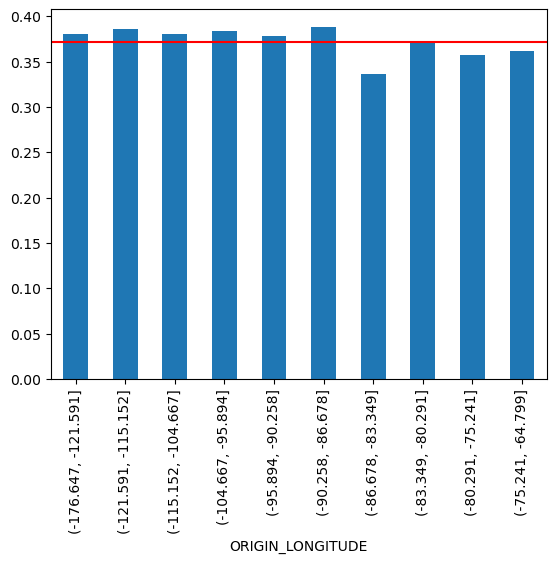

In [26]:
aux_df.groupby(pd.qcut(aux_df.ORIGIN_LONGITUDE, q=10, duplicates='drop')).is_delayed.mean().plot.bar();
plt.axhline(delay_global_rate, c='r');

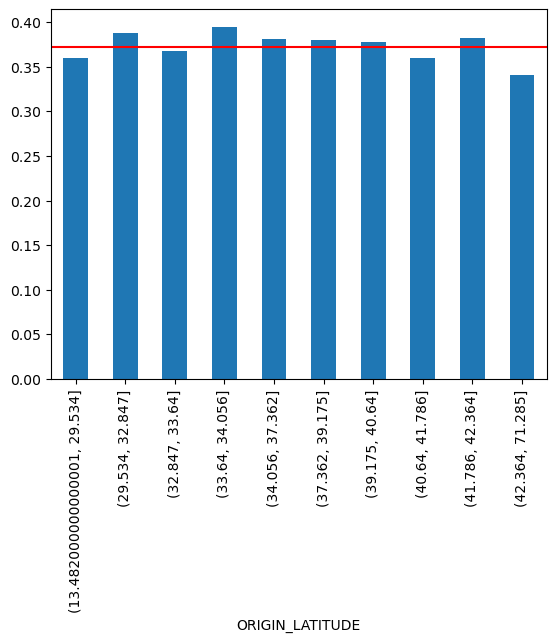

In [27]:
aux_df.groupby(pd.qcut(aux_df.ORIGIN_LATITUDE, q=10, duplicates='drop')).is_delayed.mean().plot.bar();
plt.axhline(delay_global_rate, c='r');

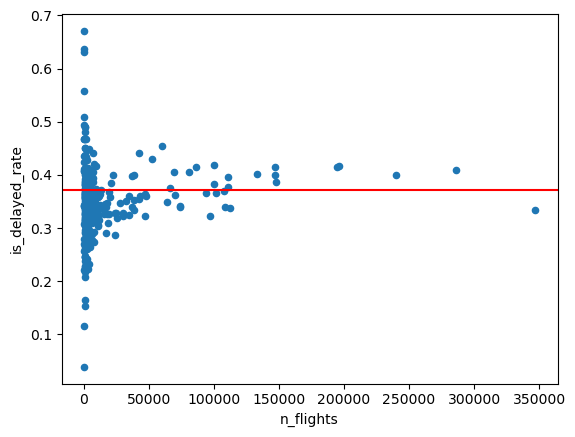

In [78]:
flights_df.groupby(pl.col('ORIGIN_AIRPORT')).agg(
    [   
        pl.col('is_delayed').count().alias('n_flights'),
        pl.col('is_delayed').mean().alias('is_delayed_rate')
    ]).sort('is_delayed_rate').to_pandas().plot.scatter(x='n_flights', y='is_delayed_rate');
plt.axhline(delay_global_rate, c='r');

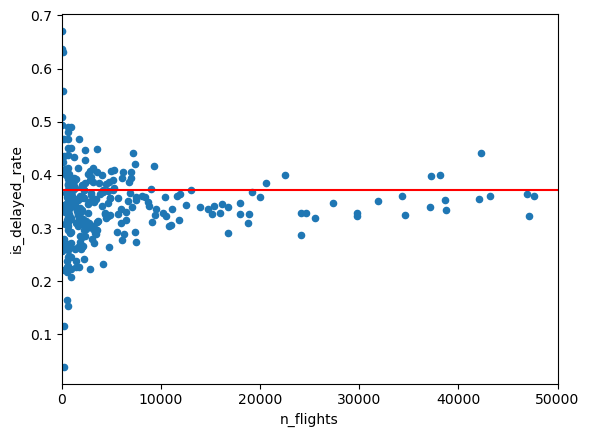

In [79]:
flights_df.groupby(pl.col('ORIGIN_AIRPORT')).agg(
    [   
        pl.col('is_delayed').count().alias('n_flights'),
        pl.col('is_delayed').mean().alias('is_delayed_rate')
    ]).sort('is_delayed_rate').to_pandas().plot.scatter(x='n_flights', y='is_delayed_rate', xlim=(0.0, 50000));
plt.axhline(delay_global_rate, c='r');

In [102]:
delay_decomposition = (flights_df.select(['ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
                   'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])
.filter(~pl.col('AIR_SYSTEM_DELAY').is_null())).to_pandas().astype('float64')
delay_decomposition = (delay_decomposition.div(delay_decomposition.ARRIVAL_DELAY, axis='index')
                       .drop('ARRIVAL_DELAY', axis=1
                            ))
delay_decomposition

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1.000000,0.0,0.000000,0.00,0.0
1,1.000000,0.0,0.000000,0.00,0.0
2,0.000000,0.0,1.000000,0.00,0.0
3,1.000000,0.0,0.000000,0.00,0.0
4,0.000000,0.0,1.000000,0.00,0.0
...,...,...,...,...,...
1003355,0.000000,0.0,0.850000,0.15,0.0
1003356,0.428571,0.0,0.571429,0.00,0.0
1003357,0.535714,0.0,0.464286,0.00,0.0
1003358,0.000000,0.0,1.000000,0.00,0.0


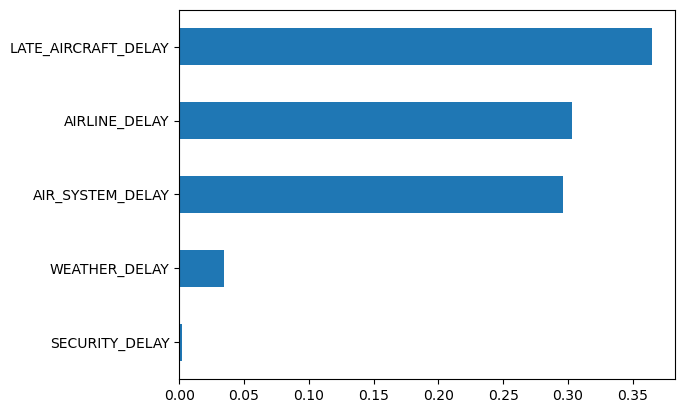

In [106]:
delay_decomposition.mean().sort_values().plot.barh();

In [35]:
flights_df.head().select(
    pl.concat_list('ORIGIN_AIRPORT', 'DESTINATION_AIRPORT').list.sort()
)

ORIGIN_AIRPORT
list[str]
"[""ANC"", ""SEA""]"
"[""LAX"", ""PBI""]"
"[""CLT"", ""SFO""]"
"[""LAX"", ""MIA""]"
"[""ANC"", ""SEA""]"


In [40]:
origin_dest_delays = \
(flights_df
#  .sample(100_000, seed=0)
 .lazy()
   .select(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY'])
   
 .with_columns(                        
    pl.concat_list('ORIGIN_AIRPORT', 'DESTINATION_AIRPORT').list.sort().alias('origin_destination'))
    
 .with_columns(
     (pl.col('origin_destination').list.get(0) == pl.col('ORIGIN_AIRPORT')).alias('orientation'))

   .with_columns(pl.col('origin_destination').list.join('_'))
   .collect()
)

origin_dest_delays

ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,origin_destination,orientation
str,str,i64,str,bool
"""ANC""","""SEA""",-22,"""ANC_SEA""",true
"""LAX""","""PBI""",-9,"""LAX_PBI""",true
"""SFO""","""CLT""",5,"""CLT_SFO""",false
"""LAX""","""MIA""",-9,"""LAX_MIA""",true
"""SEA""","""ANC""",-21,"""ANC_SEA""",false
"""SFO""","""MSP""",8,"""MSP_SFO""",false
"""LAS""","""MSP""",-17,"""LAS_MSP""",true
"""LAX""","""CLT""",-10,"""CLT_LAX""",false
"""SFO""","""DFW""",-13,"""DFW_SFO""",false


In [43]:
(origin_dest_delays
 .group_by('origin_destination', 'orientation')
 .agg(
    pl.col('ARRIVAL_DELAY').count().alias('count'),
    pl.col('ARRIVAL_DELAY').mean().alias('arrival_delay_mean')
).sort('arrival_delay_mean'))

origin_destination,orientation,count,arrival_delay_mean
str,bool,u32,f64
"""LGA_SWF""",false,1,null
"""HYS_SGF""",false,1,null
"""CLE_SCE""",true,1,null
"""GRK_MEI""",true,1,null
"""GSO_ROA""",true,2,null
"""BTM_MSO""",false,1,null
"""LEX_TYS""",false,1,null
"""BHM_LFT""",false,1,null
"""BQK_SAV""",false,1,null


In [44]:
origin_dest_delays.select('origin_destination').unique(subset=["origin_destination"]).shape

(2381, 1)

In [45]:
an_df = origin_dest_delays.filter(pl.col('origin_destination') == 'BNA_MDW').to_pandas()
an_df

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,origin_destination,orientation
0,MDW,BNA,-18.0,BNA_MDW,False
1,BNA,MDW,-16.0,BNA_MDW,True
2,BNA,MDW,-10.0,BNA_MDW,True
3,MDW,BNA,-7.0,BNA_MDW,False
4,MDW,BNA,2.0,BNA_MDW,False
...,...,...,...,...,...
4179,MDW,BNA,-4.0,BNA_MDW,False
4180,BNA,MDW,-2.0,BNA_MDW,True
4181,MDW,BNA,-4.0,BNA_MDW,False
4182,MDW,BNA,-4.0,BNA_MDW,False


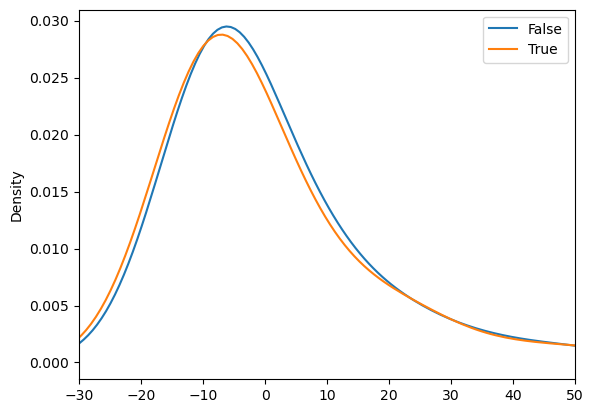

In [47]:
an_df.groupby('orientation').ARRIVAL_DELAY.plot.kde(xlim=(-30, 50), legend=True);

In [143]:
an_df.groupby('orientation').ARRIVAL_DELAY.mean()

orientation
False    7.222222
True     1.295455
Name: ARRIVAL_DELAY, dtype: float64

In [55]:
flights_df = flights_df.with_columns(
    (pl.col('YEAR').cast(pl.Utf8) + '-' + 
     pl.col('MONTH').cast(pl.Utf8).str.zfill(2) + '-' + 
     pl.col('DAY').cast(pl.Utf8).str.zfill(2)
    ).str.strptime(pl.Date, "%Y-%m-%d").alias('date')
)
flights_df.head(3)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_STATE,is_delayed,date
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,f64,f64,str,f64,f64,str,bool,date
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,61.17432,-149.99619,"""AK""",47.44898,-122.30931,"""WA""",false,2015-01-01
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",26.68316,-80.09559,"""FL""",false,2015-01-01
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,37.619,-122.37484,"""CA""",35.21401,-80.94313,"""NC""",true,2015-01-01


In [57]:
an_df = flights_df.group_by(['date', 'ORIGIN_AIRPORT']).agg([pl.col('ARRIVAL_DELAY').mean(), pl.col('date').count().alias('n_flights')])
an_df

date,ORIGIN_AIRPORT,ARRIVAL_DELAY,n_flights
date,str,f64,u32
2015-01-01,"""PBG""",-33.0,1
2015-01-01,"""BRO""",1.25,6
2015-01-01,"""BUF""",9.421053,38
2015-01-01,"""JFK""",-1.069343,275
2015-01-01,"""XNA""",11.0,18
2015-01-01,"""RSW""",3.265306,98
2015-01-01,"""PVD""",-3.137931,29
2015-01-01,"""PIT""",-4.392857,56
2015-01-01,"""OKC""",11.189189,40


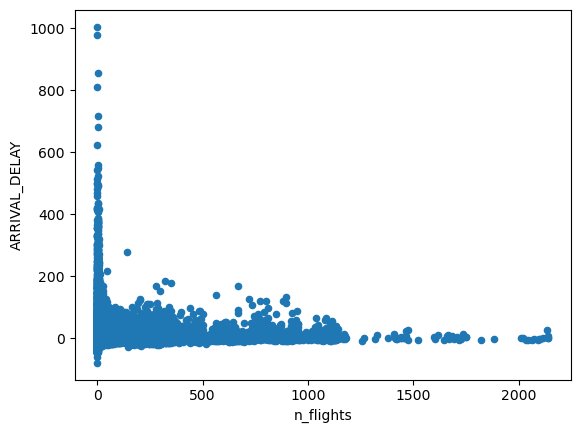

In [157]:
an_df.to_pandas().plot.scatter(x='n_flights', y='ARRIVAL_DELAY');